# Exploring other types of plots for temporal data

- Calender plot 
- Polar bar chart
- Time series
- Reflection

## Load the Dataset & Aggregate Crimes by Date

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (Update path if needed)
file_path = "Data/SF_Crime_Data_Cleaned.csv"
df = pd.read_csv(file_path, parse_dates=["Incident Date"])

# Convert "Incident Time" to extract hours
df["Incident Time"] = pd.to_datetime(df["Incident Time"], format="%H:%M", errors="coerce").dt.hour

# Define focus crimes
focuscrimes = {'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS',
               'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'}

# Filter dataset for focus crimes
df_focus = df[df["Incident Category"].isin(focuscrimes)]
df_focus.head()


,Incident Date,Incident Time,Incident Day of Week,Incident Category,Incident Description,Police District,Latitude,Longitude
0,2004-11-22,17,Monday,ROBBERY,"ROBBERY, BODILY FORCE",INGLESIDE,37.708311,-122.420084
1,2005-10-18,20,Tuesday,VEHICLE THEFT,STOLEN AUTOMOBILE,PARK,90.000000,-120.500000
2,2004-02-15,2,Sunday,VEHICLE THEFT,STOLEN AUTOMOBILE,SOUTHERN,90.000000,-120.500000
4,2010-11-21,17,Sunday,ASSAULT,BATTERY,SOUTHERN,37.770913,-122.410541
5,2013-04-02,15,Tuesday,ASSAULT,BATTERY,TARAVAL,37.745158,-122.470366


## Calendar plot 

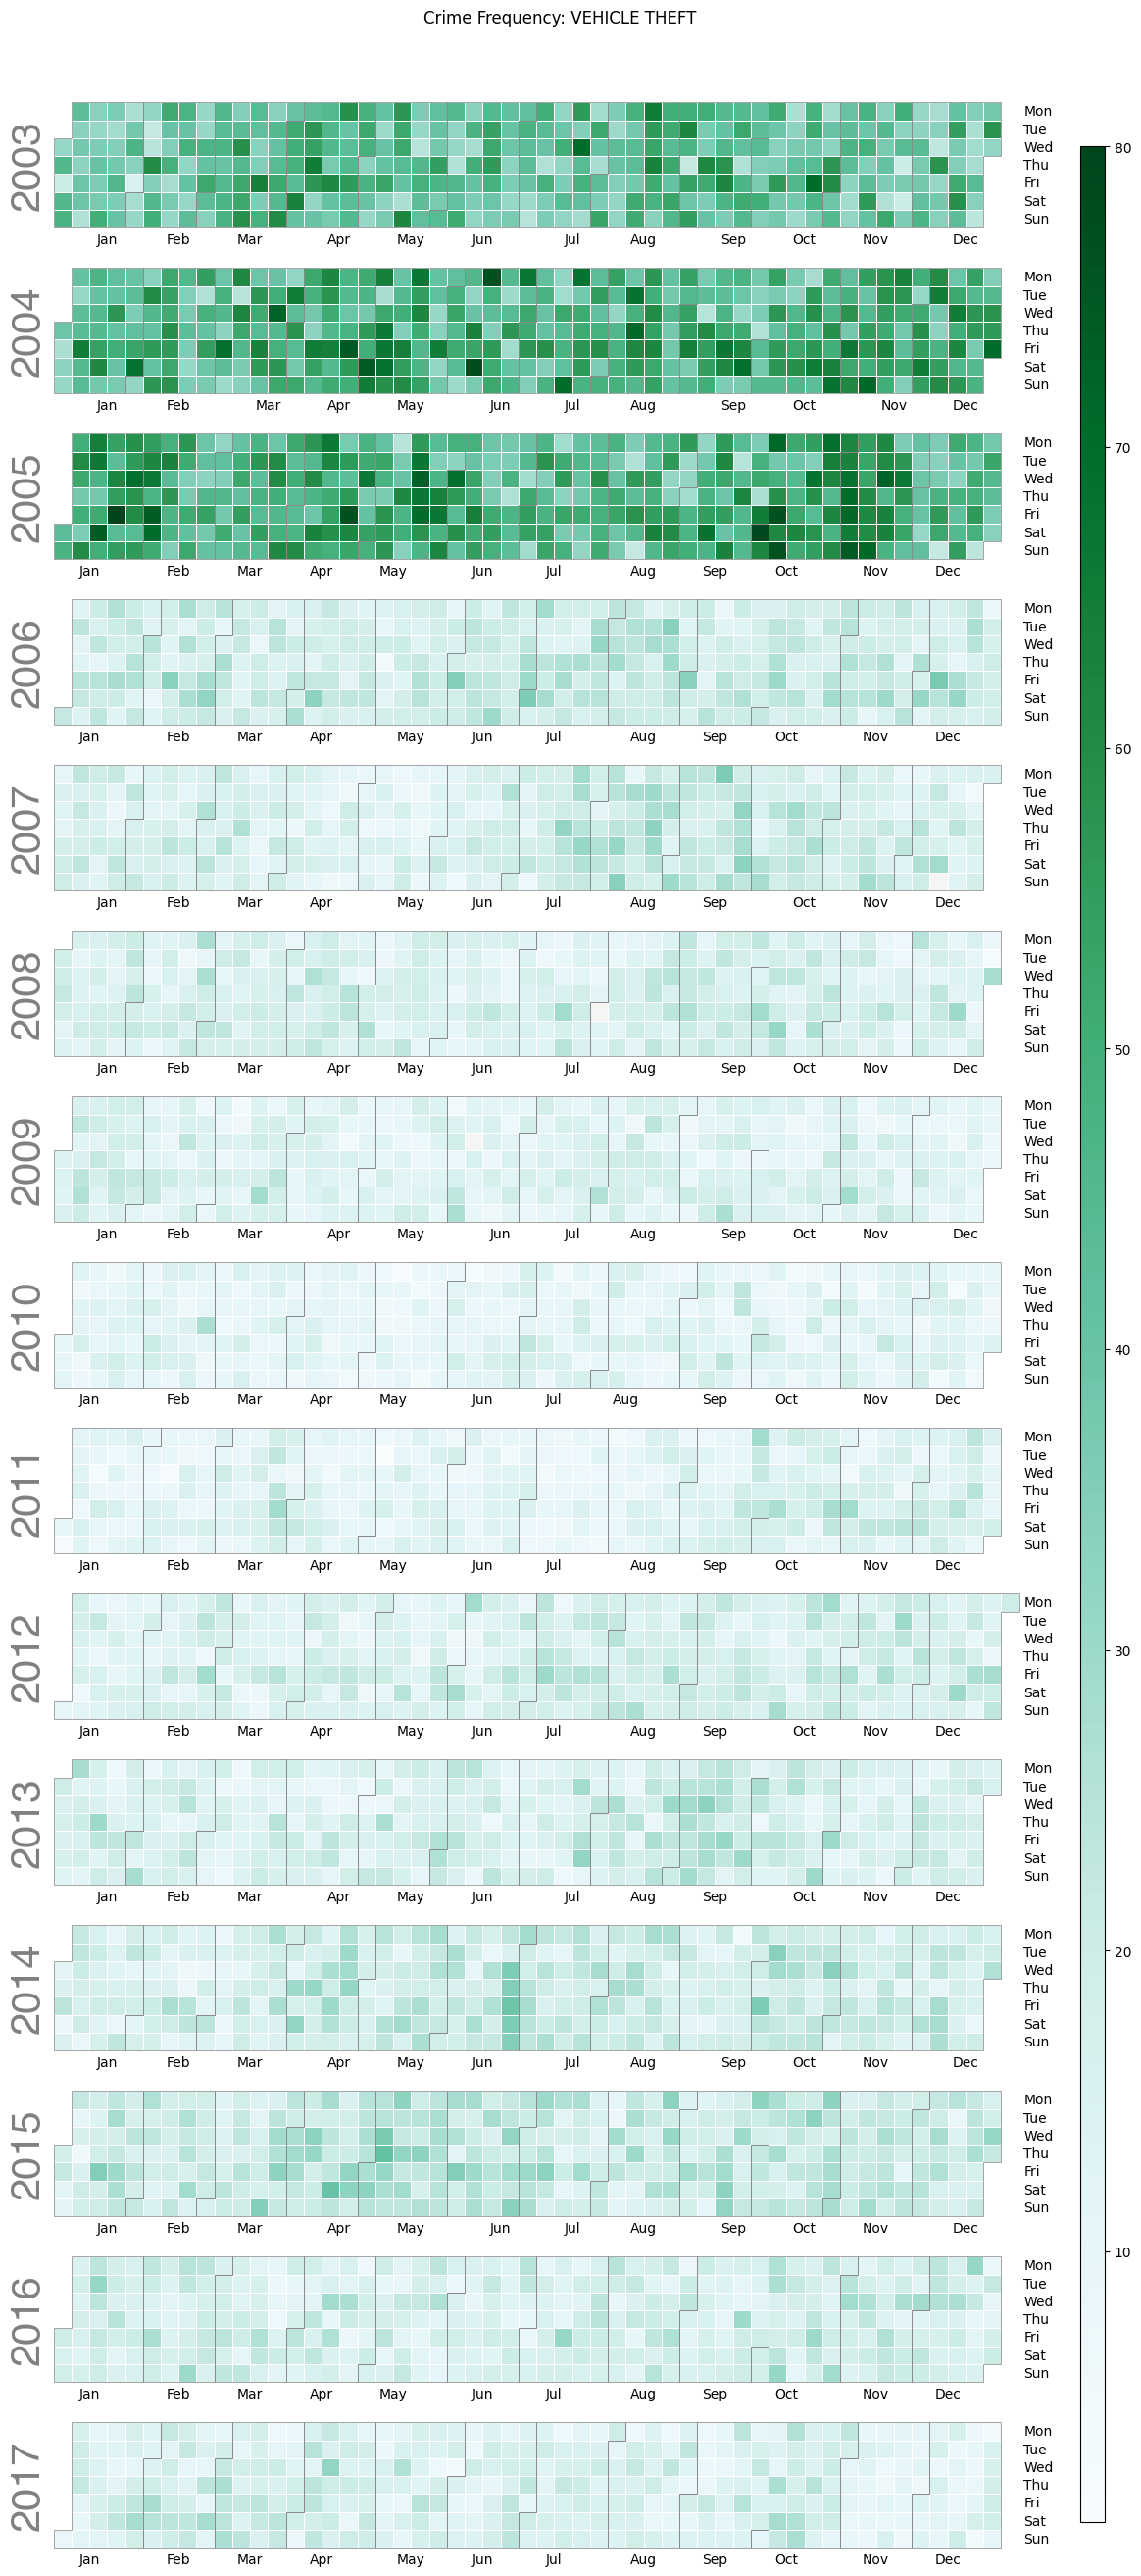

In [21]:
import calplot
# Select a specific crime type 
crime_type = "VEHICLE THEFT" 

# Aggregate crime counts per day
crime_daily = df_focus[df_focus["Incident Category"] == crime_type].groupby("Incident Date").size()

# Plot the calendar heatmap
calplot.calplot(crime_daily, cmap="BuGn", colorbar=True, suptitle=f"Crime Frequency: {crime_type}", linewidth=0.5, dropzero=True, edgecolor="gray")

# Show the plot
plt.show()

Based on the calendar plot, it can be seen that in San Francisco from 2003 to 2017 highlights a striking trend. The years 2003 to 2005 show a significantly higher frequency of vehicle thefts compared to the following years, with crime rates appearing consistently high throughout these years. However, from 2006 onwards, there is a noticeable decline, with thefts becoming less frequent and relatively stable after 2010 than the early 2000's. 

## Polar bar chart

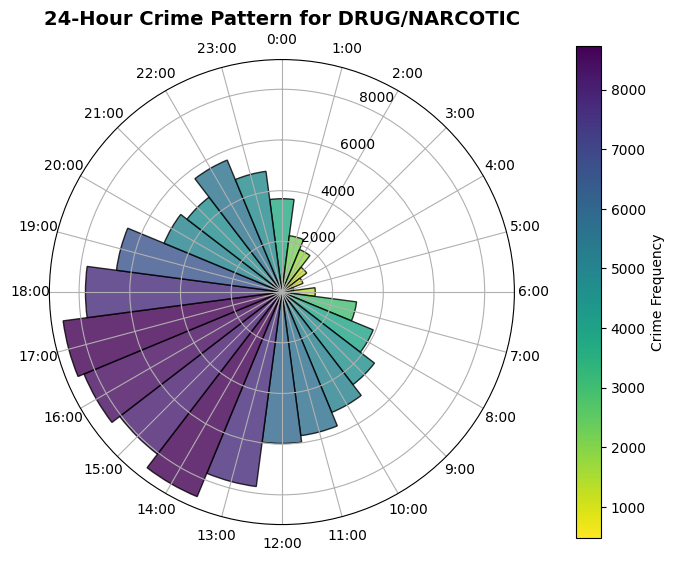

In [25]:
import numpy as np
import matplotlib.cm as cm

# Select a specific crime type
crime_type = "DRUG/NARCOTIC"  

# Filter dataset for the selected crime
df_crime = df_focus[df_focus["Incident Category"] == crime_type]

# Aggregate crime counts per hour
crime_hourly = df_crime["Incident Time"].value_counts().sort_index()

# Convert hours (0-23) into radians for the polar plot
angles = np.linspace(0, 2 * np.pi, 24, endpoint=False)  

# Create the polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Normalize crime data for color mapping
norm = plt.Normalize(vmin=crime_hourly.min(), vmax=crime_hourly.max())
colors = cm.viridis_r(norm(crime_hourly))

# Bar chart in polar coordinates
bars = ax.bar(angles, crime_hourly, width=np.pi/12, bottom=0, color=colors, alpha=0.8, edgecolor="black")

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cm.viridis_r, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.8, pad=0.1)
cbar.set_label("Crime Frequency")

# Format the polar plot
ax.set_theta_zero_location("N")  
ax.set_theta_direction(-1)  
ax.set_xticks(angles)  
ax.set_xticklabels([f"{h}:00" for h in range(24)])  

# Add title
ax.set_title(f"24-Hour Crime Pattern for {crime_type}", fontsize=14, fontweight="bold")

# Show the plot
plt.show()


Based on the polar plot it is revealed the that drug/narcotic related crimes peak between 1 PM and 6 PM, with frequencies ranging between 7000 and 8000 incidents. This suggests increased drug activity during the late afternoon and early evening. In contrast, crime occurrences are significantly lower during the early morning hours (midnight to 6 AM), as indicated by the lighter-colored and smaller bars.